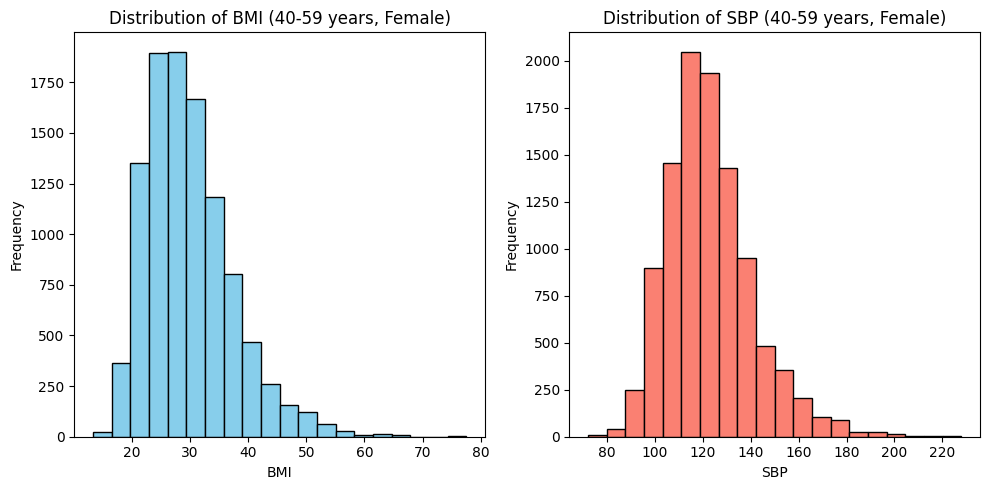

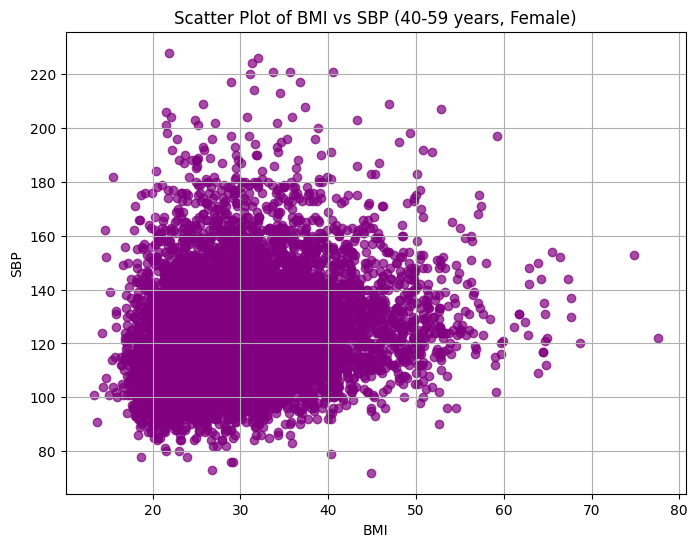

bmi           sbp
count  10322.000000  10322.000000
mean      29.871992    122.845056
std        7.452950     18.208193
min       13.310609     72.000000
25%       24.390026    110.000000
50%       28.749463    120.000000
75%       33.884874    132.000000
max       77.525831    228.000000

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, invwishart, dirichlet
from tqdm import tqdm
from Samplers.gibbs_sampler import *
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('data/NHANES_adults_data_preprocessed.csv')
filtered_data = data[(data['sex'] == 2) & (data['age'] >= 40) & (data['age'] < 60)]
filtered_data = data[(data['sex'] == 2) & (data['age'] >= 40) & (data['age'] < 60)]
cleaned_data = filtered_data[
    (filtered_data['bmi'] >= 10) & (filtered_data['bmi'] <= 80) &
    (filtered_data['sbp'] >= 70) & (filtered_data['sbp'] <= 270)
]
bmi_sbp_data = cleaned_data[['bmi', 'sbp']]

# Plot BMI and SBP distributions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(bmi_sbp_data['bmi'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of BMI (40-59 years, Female)')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(bmi_sbp_data['sbp'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of SBP (40-59 years, Female)')
plt.xlabel('SBP')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Scatter plot between BMI and SBP
plt.figure(figsize=(8, 6))
plt.scatter(bmi_sbp_data['bmi'], bmi_sbp_data['sbp'], alpha=0.7, color='purple')
plt.title('Scatter Plot of BMI vs SBP (40-59 years, Female)')
plt.xlabel('BMI')
plt.ylabel('SBP')
plt.grid()
plt.show()

# Display filtered data summary
bmi_sbp_summary = bmi_sbp_data.describe()
bmi_sbp_summary




In [2]:
mean_bmi = bmi_sbp_data['bmi'].mean()
mean_sbp = bmi_sbp_data['sbp'].mean()
std_bmi = bmi_sbp_data['bmi'].std()
std_sbp = bmi_sbp_data['sbp'].std()

In [3]:
bmi_sbp_data.loc[:, 'bmi'] = (bmi_sbp_data['bmi'] - mean_bmi) / std_bmi
bmi_sbp_data.loc[:, 'sbp'] = (bmi_sbp_data['sbp'] - mean_sbp) / std_sbp
bmi_bounds = (np.array([18, 25, 30, np.inf])-mean_bmi)/std_bmi
sbp_bounds = (np.array([140, 160, np.inf])-mean_sbp)/std_sbp

In [4]:
def h1(mu):
    h = np.min([np.linalg.norm(mu[i] - mu[j]) for i in range(len(mu)) for j in range(len(mu)) if i != j])
    return h

def h2(mu):
    """
    Returns 1 if unique, 0 otherwise.
    """
    # Extract BMI and SBP values from mu
    bmi = mu[:, 0]
    sbp = mu[:, 1]
    
    # Use np.digitize to find interval indices for BMI and SBP
    bmi_blocks = np.digitize(bmi, bins=bmi_bounds)
    sbp_blocks = np.digitize(sbp, bins=sbp_bounds)
    
    # Combine BMI and SBP block indices into tuples
    blocks = set(zip(bmi_blocks, sbp_blocks))
    
    # If all blocks are unique, return 1; otherwise, return 0
    return 1 if len(blocks) == len(mu) else 0


Running Gibbs Sampler for Run 1


Sampling: 100%|██████████| 5000/5000 [05:46<00:00, 14.45it/s]


Running Gibbs Sampler for Run 2


Sampling: 100%|██████████| 5000/5000 [05:52<00:00, 14.20it/s]


Running Gibbs Sampler for Run 3


Sampling: 100%|██████████| 5000/5000 [05:50<00:00, 14.27it/s]


Running Gibbs Sampler for Run 4


Sampling: 100%|██████████| 5000/5000 [07:38<00:00, 10.92it/s]  


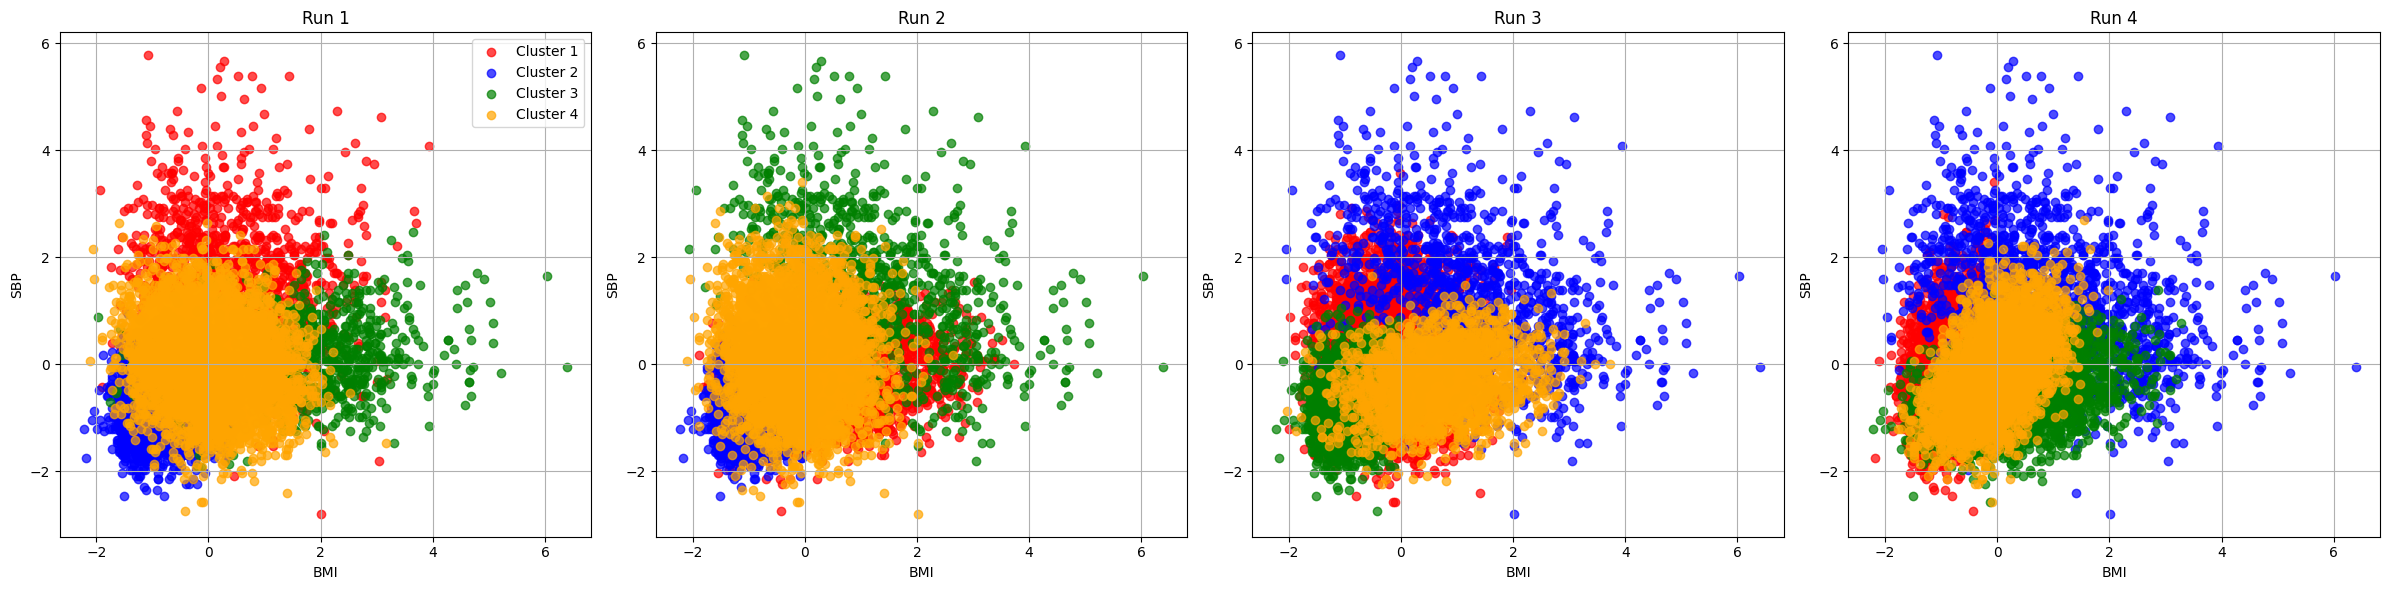

--- Run 1 ---
Mixing Proportions (pi):
  Cluster 1: Mean = 0.1119
  Cluster 2: Mean = 0.2953
  Cluster 3: Mean = 0.1107
  Cluster 4: Mean = 0.4821
Means (mu, Dimension 1):
  Cluster 1: Mean = 0.3880
  Cluster 2: Mean = -0.7612
  Cluster 3: Mean = 1.4304
  Cluster 4: Mean = 0.0536
Means (mu, Dimension 2):
  Cluster 1: Mean = 1.4723
  Cluster 2: Mean = -0.6865
  Cluster 3: Mean = 0.1191
  Cluster 4: Mean = 0.0514
Variances (sigma², Dimension 1):
  Cluster 1: Mean = 0.9755
  Cluster 2: Mean = 0.1989
  Cluster 3: Mean = 1.4610
  Cluster 4: Mean = 0.5060
Variances (sigma², Dimension 2):
  Cluster 1: Mean = 1.5670
  Cluster 2: Mean = 0.3094
  Cluster 3: Mean = 0.5916
  Cluster 4: Mean = 0.5737
--- Run 2 ---
Mixing Proportions (pi):
  Cluster 1: Mean = 0.3033
  Cluster 2: Mean = 0.2000
  Cluster 3: Mean = 0.1215
  Cluster 4: Mean = 0.3752
Means (mu, Dimension 1):
  Cluster 1: Mean = 0.4344
  Cluster 2: Mean = -0.8822
  Cluster 3: Mean = 1.2064
  Cluster 4: Mean = -0.2659
Means (mu, Dimension 

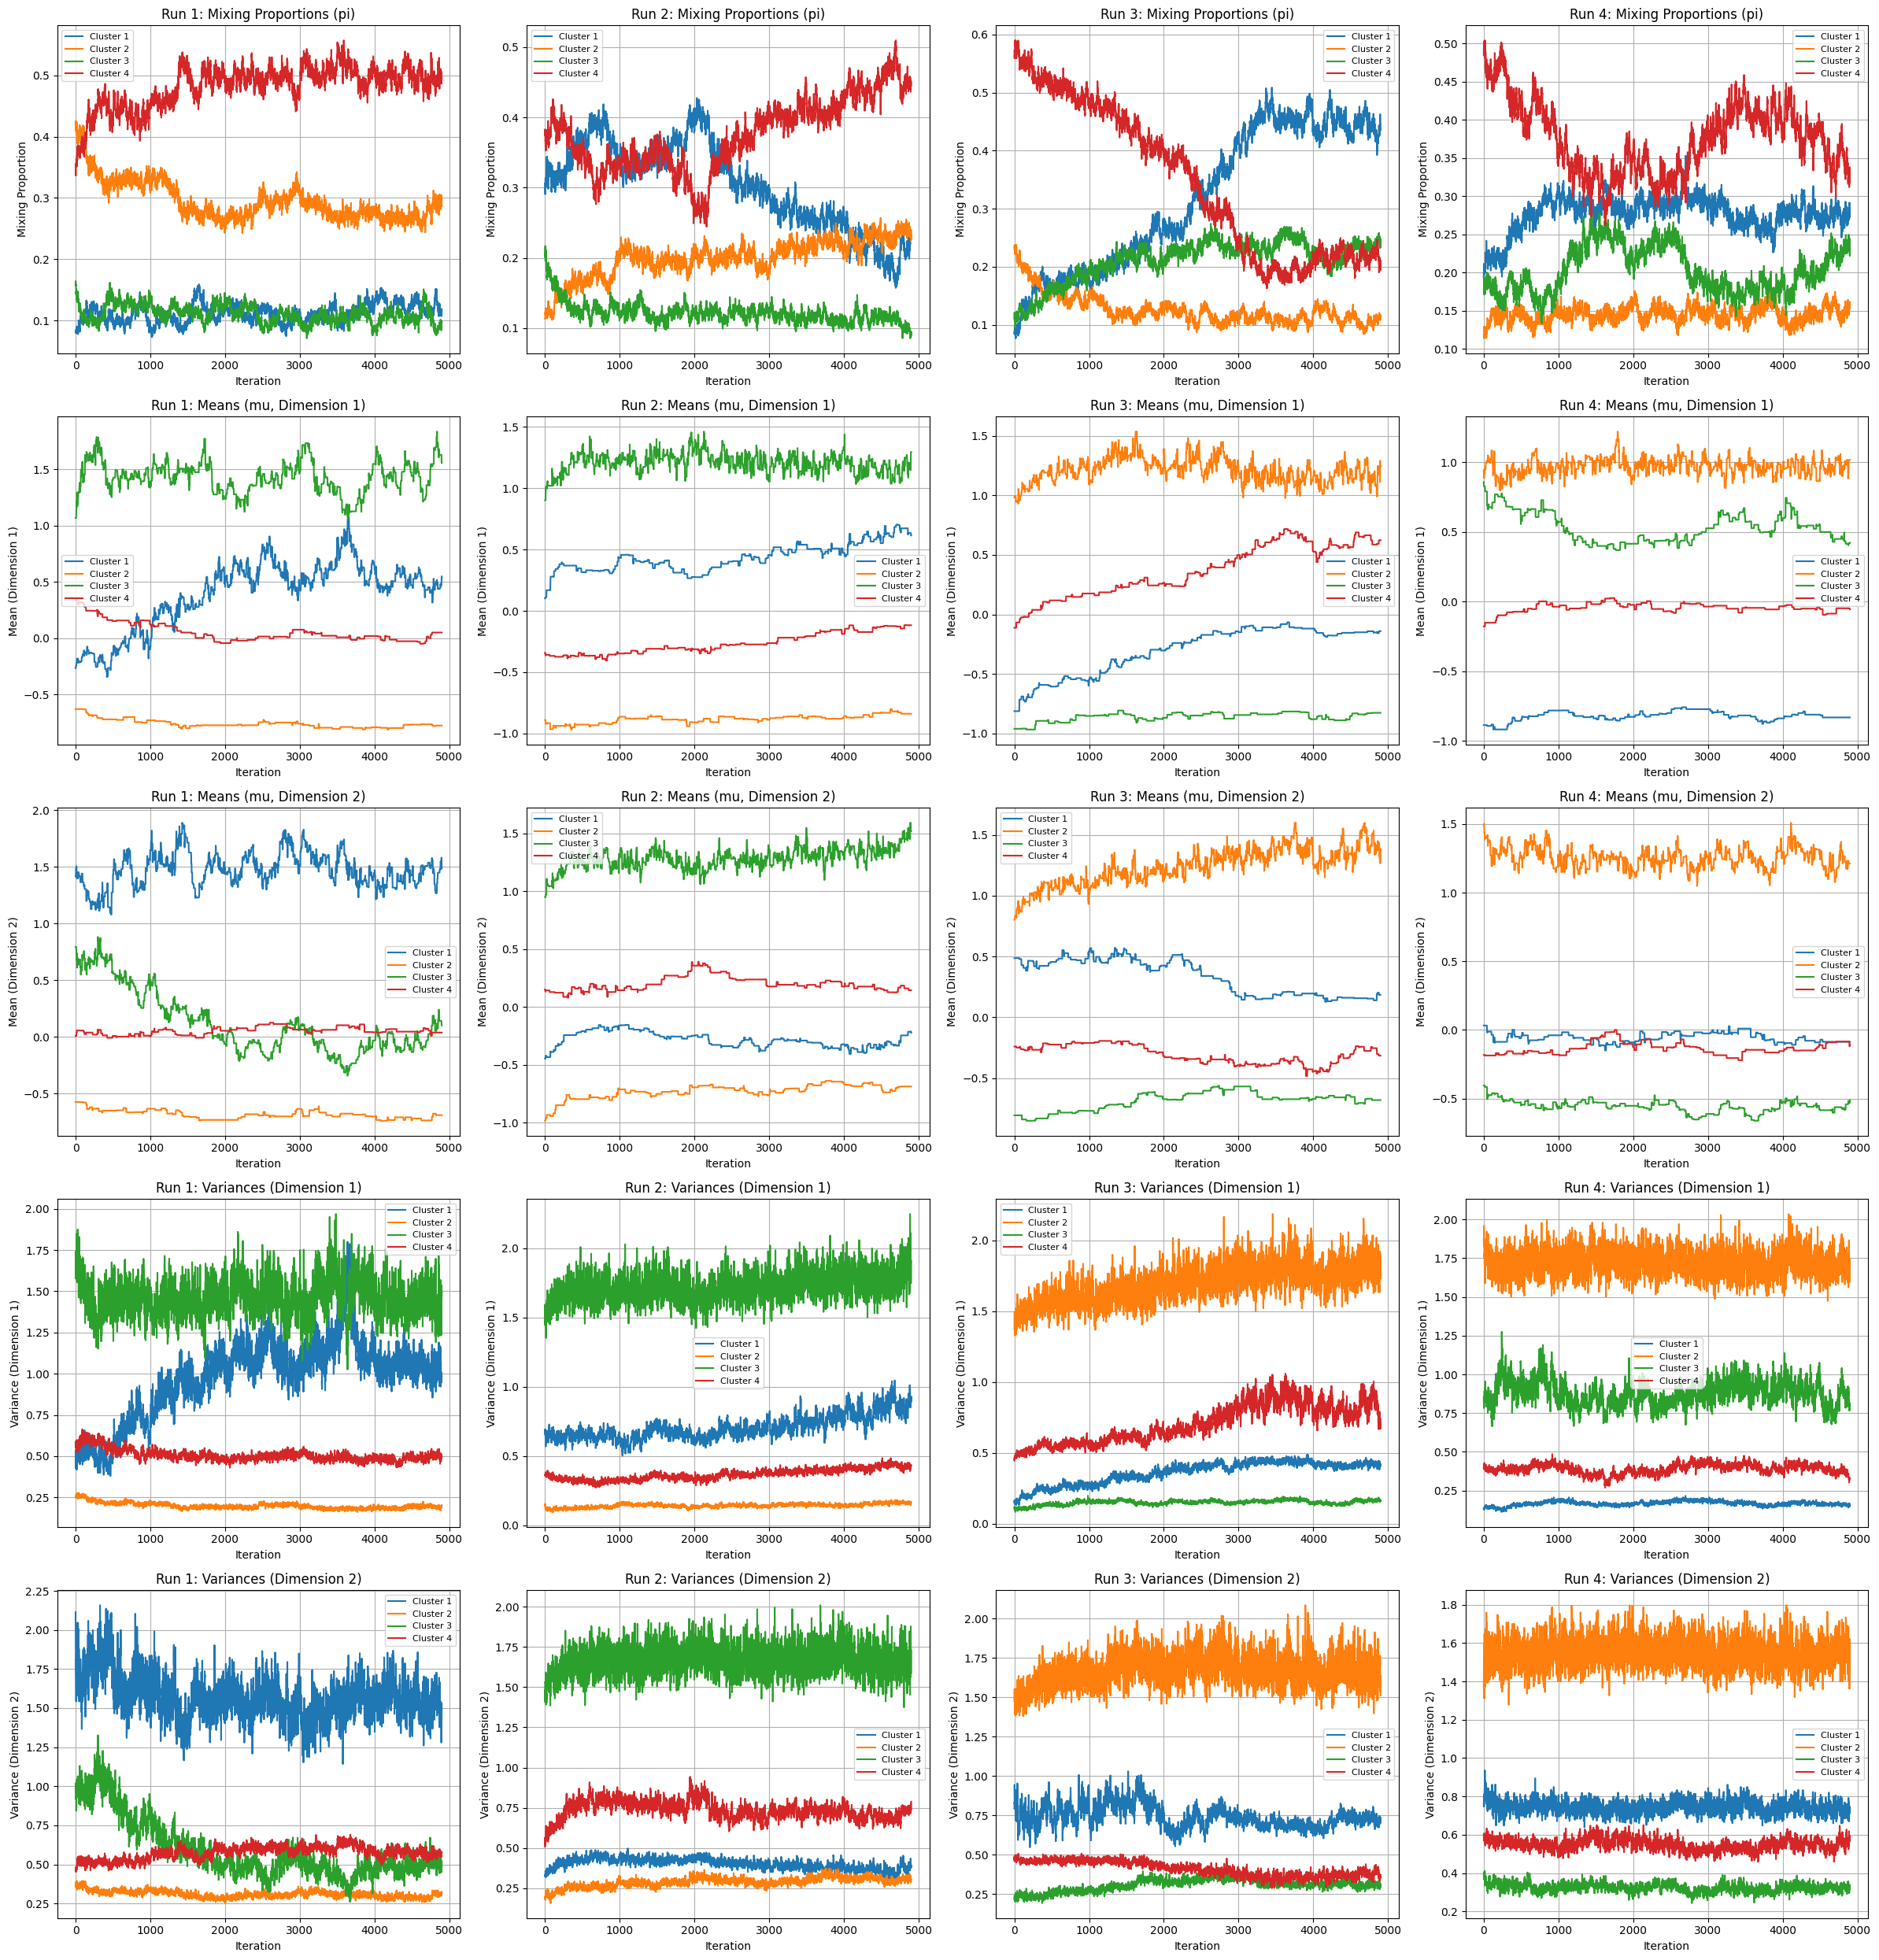

In [5]:
# Parameters
num_runs = 4
num_iterations = 5000
K = 4  # Number of clusters
X = bmi_sbp_data[['bmi', 'sbp']].to_numpy()

# Store all iterations for each run
all_run_samples = []

# Run the Gibbs sampler multiple times
for run in range(num_runs):
    print(f"Running Gibbs Sampler for Run {run + 1}")
    run_samples = bayesian_repulsive(X, K, num_iterations, h1)
    all_run_samples.append(run_samples)

# Plot scatter graphs with last iteration results
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'cyan', 'magenta']
fig, axes = plt.subplots(1, num_runs, figsize=(6 * num_runs, 6))

if num_runs == 1:
    axes = [axes]  # Handle single plot case

for run, ax in enumerate(axes):
    last_sample = all_run_samples[run][-1]  # Get the last iteration for the current run
    _, _, _, z = last_sample  # Extract z (cluster assignments)
    for k in range(K):
        ax.scatter(
            X[np.array(z) == k, 0],
            X[np.array(z) == k, 1],
            alpha=0.7,
            color=colors[k],
            label=f"Cluster {k + 1}" if run == 0 else None,
        )
    ax.set_title(f"Run {run + 1}")
    ax.set_xlabel("BMI")
    ax.set_ylabel("SBP")
    ax.grid()

axes[0].legend(loc="upper right")
plt.tight_layout()
plt.show()

# --- Trace Plots for Multiple Runs ---
fig, axes = plt.subplots(5, num_runs, figsize=(6 * num_runs, 25))  # Adjust rows for pi, mu, and sigma

for run in range(num_runs):
    run_samples = all_run_samples[run]
    pi_samples = np.array([s[0] for s in run_samples])  # Mixing proportions
    mu_samples = np.array([s[1] for s in run_samples])  # Means
    sigma_samples = np.array([s[2] for s in run_samples])  # Covariances

    print(f"--- Run {run + 1} ---")
    
    # --- First Row: Trace Plots for Mixing Proportions (pi) ---
    print("Mixing Proportions (pi):")
    for k in range(K):
        mean_pi = np.mean(pi_samples[:, k])
        print(f"  Cluster {k + 1}: Mean = {mean_pi:.4f}")
        axes[0, run].plot(pi_samples[:, k], label=f'Cluster {k + 1}')
    axes[0, run].set_title(f"Run {run + 1}: Mixing Proportions (pi)")
    axes[0, run].set_xlabel("Iteration")
    axes[0, run].set_ylabel("Mixing Proportion")
    axes[0, run].legend(fontsize=8)
    axes[0, run].grid()

    # --- Second Row: Trace Plots for Means (mu, Dimension 1) ---
    print("Means (mu, Dimension 1):")
    for k in range(K):
        mean_mu_dim1 = np.mean(mu_samples[:, k, 0])
        print(f"  Cluster {k + 1}: Mean = {mean_mu_dim1:.4f}")
        axes[1, run].plot(mu_samples[:, k, 0], label=f'Cluster {k + 1}')
    axes[1, run].set_title(f"Run {run + 1}: Means (mu, Dimension 1)")
    axes[1, run].set_xlabel("Iteration")
    axes[1, run].set_ylabel("Mean (Dimension 1)")
    axes[1, run].legend(fontsize=8)
    axes[1, run].grid()

    # --- Third Row: Trace Plots for Means (mu, Dimension 2) ---
    print("Means (mu, Dimension 2):")
    for k in range(K):
        mean_mu_dim2 = np.mean(mu_samples[:, k, 1])
        print(f"  Cluster {k + 1}: Mean = {mean_mu_dim2:.4f}")
        axes[2, run].plot(mu_samples[:, k, 1], label=f'Cluster {k + 1}')
    axes[2, run].set_title(f"Run {run + 1}: Means (mu, Dimension 2)")
    axes[2, run].set_xlabel("Iteration")
    axes[2, run].set_ylabel("Mean (Dimension 2)")
    axes[2, run].legend(fontsize=8)
    axes[2, run].grid()

    # --- Fourth Row: Trace Plots for Variances (sigma², Dimension 1) ---
    print("Variances (sigma², Dimension 1):")
    for k in range(K):
        variances_dim1 = [sigma_samples[i, k, 0, 0] for i in range(len(sigma_samples))]
        mean_sigma_dim1 = np.mean(variances_dim1)
        print(f"  Cluster {k + 1}: Mean = {mean_sigma_dim1:.4f}")
        axes[3, run].plot(variances_dim1, label=f'Cluster {k + 1}')
    axes[3, run].set_title(f"Run {run + 1}: Variances (Dimension 1)")
    axes[3, run].set_xlabel("Iteration")
    axes[3, run].set_ylabel("Variance (Dimension 1)")
    axes[3, run].legend(fontsize=8)
    axes[3, run].grid()

    # --- Fifth Row: Trace Plots for Variances (sigma², Dimension 2) ---
    print("Variances (sigma², Dimension 2):")
    for k in range(K):
        variances_dim2 = [sigma_samples[i, k, 1, 1] for i in range(len(sigma_samples))]
        mean_sigma_dim2 = np.mean(variances_dim2)
        print(f"  Cluster {k + 1}: Mean = {mean_sigma_dim2:.4f}")
        axes[4, run].plot(variances_dim2, label=f'Cluster {k + 1}')
    axes[4, run].set_title(f"Run {run + 1}: Variances (Dimension 2)")
    axes[4, run].set_xlabel("Iteration")
    axes[4, run].set_ylabel("Variance (Dimension 2)")
    axes[4, run].legend(fontsize=8)
    axes[4, run].grid()

plt.tight_layout()
plt.show()

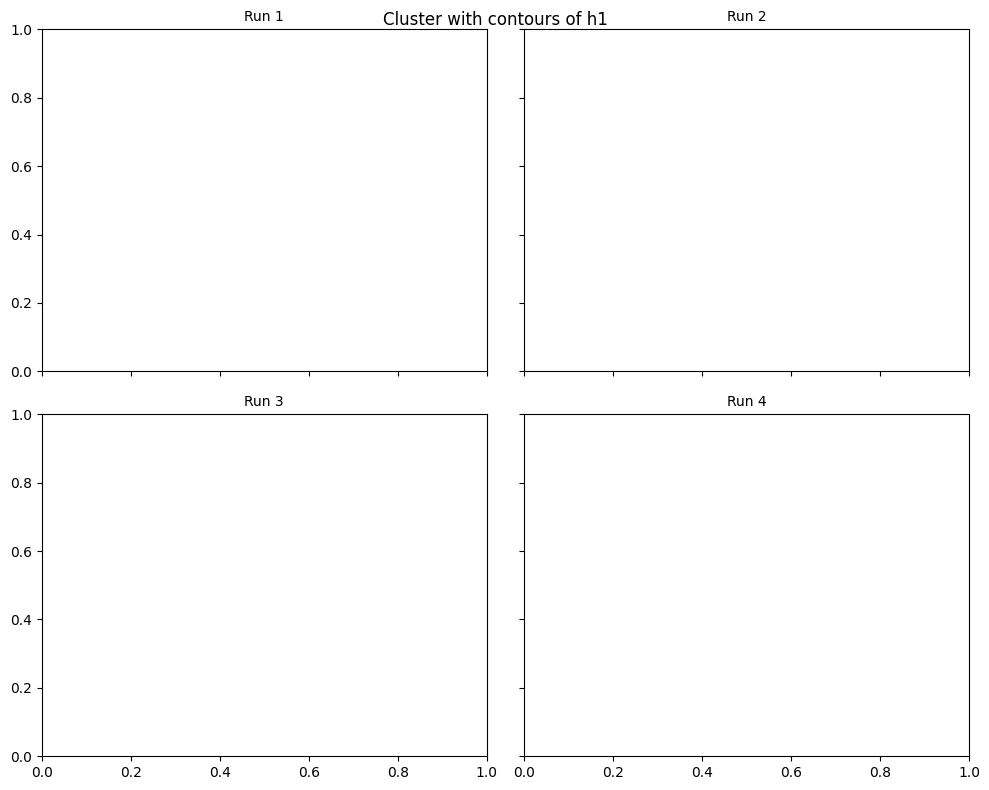

In [6]:
cols = 2  # Number of columns in the subplot grid
rows = (num_runs + cols - 1) // cols  # Calculate the required number of rows
fig, axes = plt.subplots(rows, cols, figsize=(10, 4 * rows), sharex=True, sharey=True)
axes = np.array(axes).flatten() 

for run, (ax, run_samples) in enumerate(zip(axes, all_run_samples)):
    mu_samples = np.array([s[1] for s in run_samples])  # Means
    sigma_samples = np.array([s[2] for s in run_samples])  # Covariances
    ax.set_title(f"Run {run + 1}", fontsize=10)

plt.tight_layout()
plt.suptitle("Cluster with contours of h1")
plt.show()

Running Gibbs Sampler for Run 1


Sampling:   0%|          | 0/5000 [00:00<?, ?it/s]/Users/yunjiaqi/Desktop/M4R/Samplers/gibbs_sampler.py:136: RuntimeWarning: divide by zero encountered in log
  + np.log(h(proposed_mu))
/Users/yunjiaqi/Desktop/M4R/Samplers/gibbs_sampler.py:140: RuntimeWarning: divide by zero encountered in log
  + np.log(h(mu))
/Users/yunjiaqi/Desktop/M4R/Samplers/gibbs_sampler.py:134: RuntimeWarning: invalid value encountered in scalar subtract
  log_acceptance_rate = (
Sampling: 100%|██████████| 5000/5000 [05:49<00:00, 14.30it/s]


Running Gibbs Sampler for Run 2


Sampling: 100%|██████████| 5000/5000 [05:47<00:00, 14.41it/s]


Running Gibbs Sampler for Run 3


Sampling: 100%|██████████| 5000/5000 [05:55<00:00, 14.08it/s]


Running Gibbs Sampler for Run 4


Sampling: 100%|██████████| 5000/5000 [05:51<00:00, 14.22it/s]


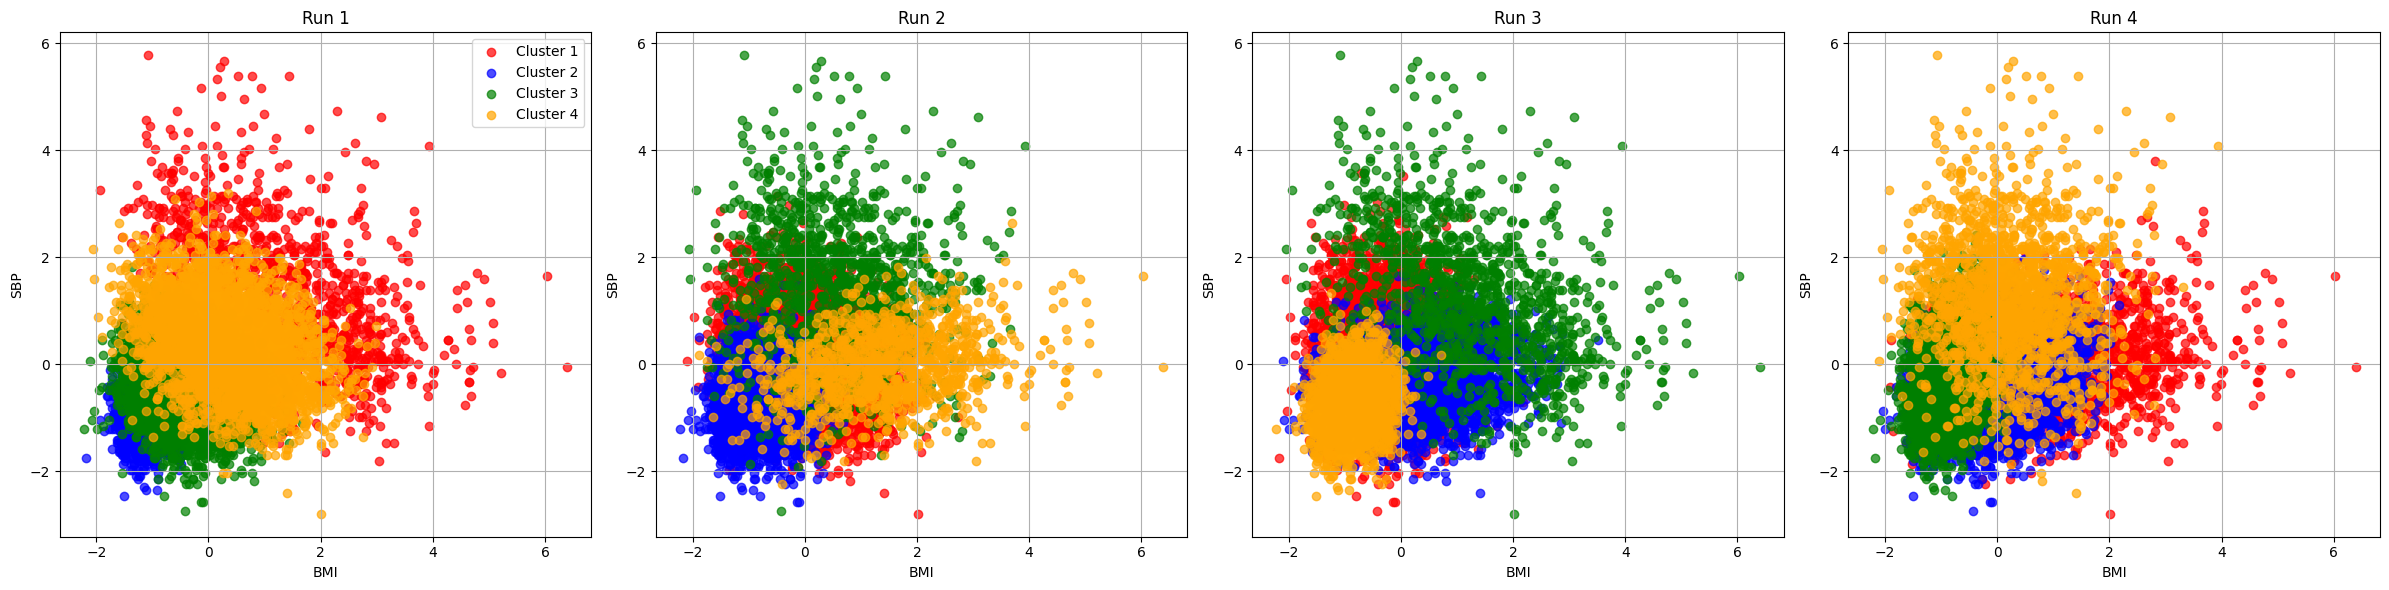

--- Run 1 ---
Mixing Proportions (pi):
  Cluster 1: Mean = 0.1235
  Cluster 2: Mean = 0.1276
  Cluster 3: Mean = 0.3641
  Cluster 4: Mean = 0.3849
Means (mu, Dimension 1):
  Cluster 1: Mean = 1.2300
  Cluster 2: Mean = -1.0282
  Cluster 3: Mean = -0.4024
  Cluster 4: Mean = 0.3289
Means (mu, Dimension 2):
  Cluster 1: Mean = 1.3101
  Cluster 2: Mean = -0.9472
  Cluster 3: Mean = -0.4229
  Cluster 4: Mean = 0.2885
Variances (sigma², Dimension 1):
  Cluster 1: Mean = 1.7508
  Cluster 2: Mean = 0.1073
  Cluster 3: Mean = 0.2859
  Cluster 4: Mean = 0.6454
Variances (sigma², Dimension 2):
  Cluster 1: Mean = 1.6215
  Cluster 2: Mean = 0.2284
  Cluster 3: Mean = 0.3628
  Cluster 4: Mean = 0.5809
--- Run 2 ---
Mixing Proportions (pi):
  Cluster 1: Mean = 0.5068
  Cluster 2: Mean = 0.2082
  Cluster 3: Mean = 0.1370
  Cluster 4: Mean = 0.1481
Means (mu, Dimension 1):
  Cluster 1: Mean = -0.0965
  Cluster 2: Mean = -0.8936
  Cluster 3: Mean = 0.3442
  Cluster 4: Mean = 1.2551
Means (mu, Dimensio

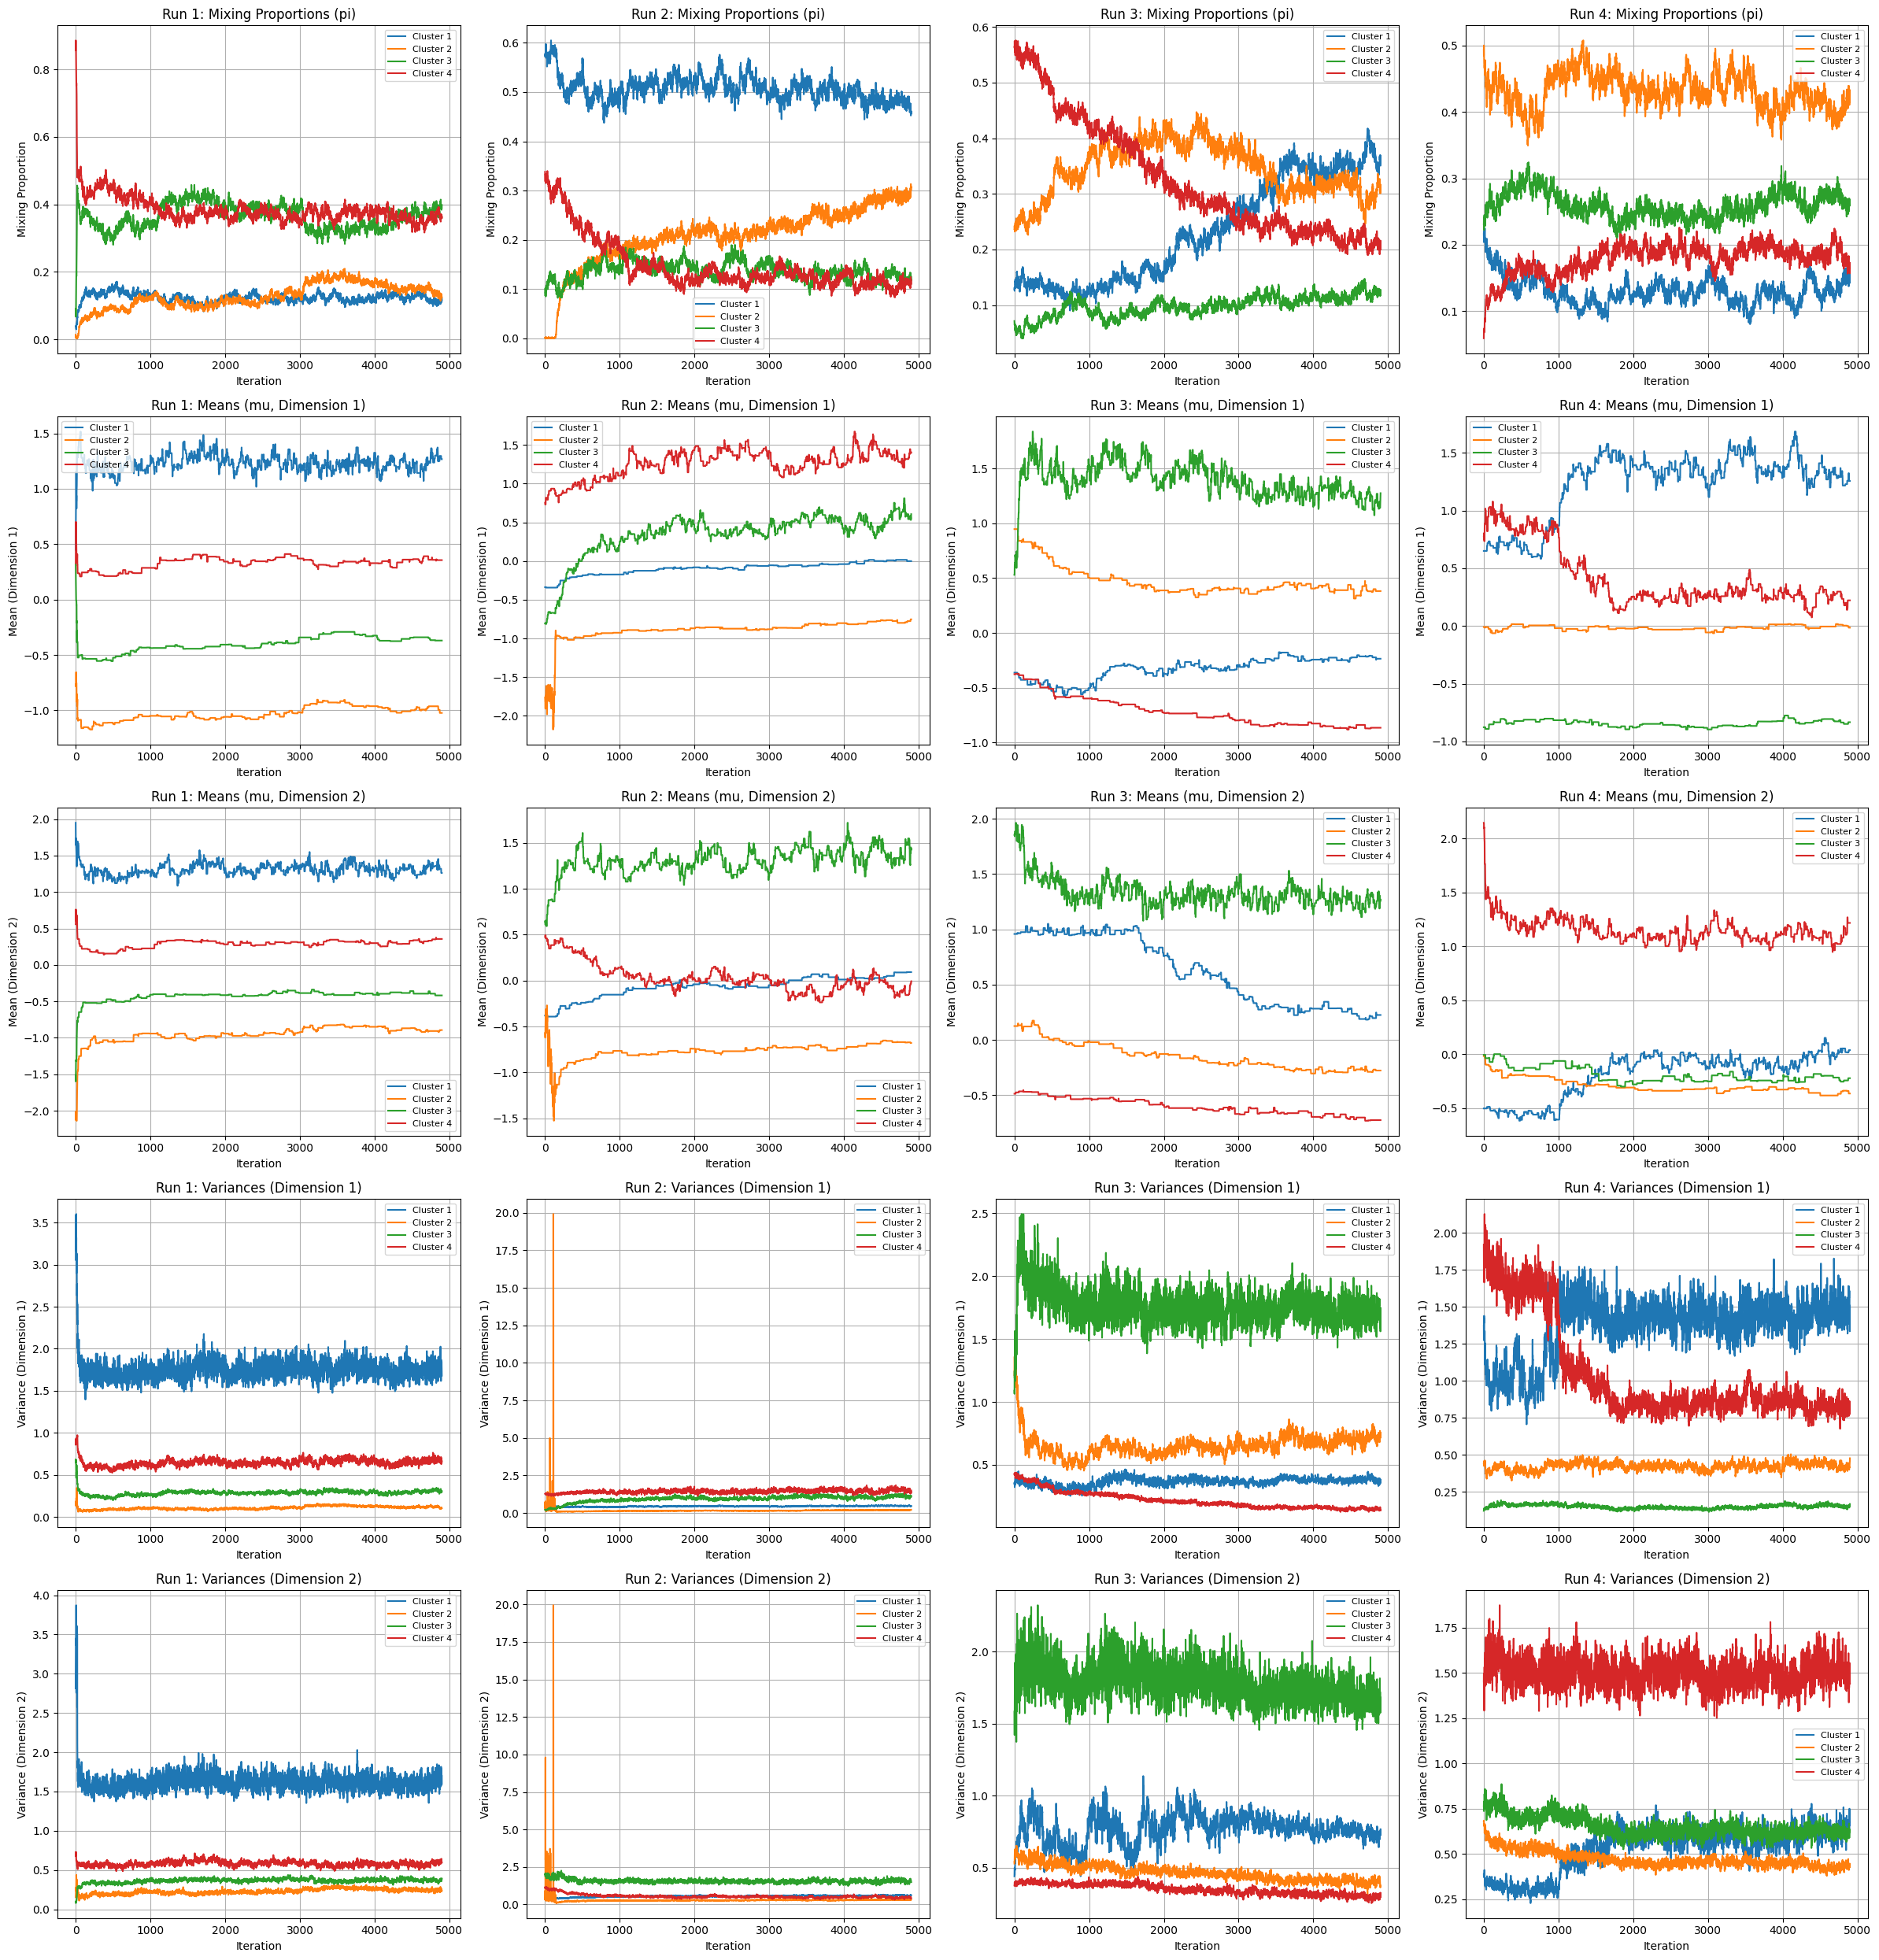

In [7]:
# Parameters
num_runs = 4
num_iterations = 5000
K = 4  # Number of clusters
X = bmi_sbp_data[['bmi', 'sbp']].to_numpy()

# Store all iterations for each run
all_run_samples = []

# Run the Gibbs sampler multiple times
for run in range(num_runs):
    print(f"Running Gibbs Sampler for Run {run + 1}")
    run_samples = bayesian_repulsive(X, K, num_iterations, h2)
    all_run_samples.append(run_samples)

# Plot scatter graphs with last iteration results
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'cyan', 'magenta']
fig, axes = plt.subplots(1, num_runs, figsize=(6 * num_runs, 6))

if num_runs == 1:
    axes = [axes]  # Handle single plot case

for run, ax in enumerate(axes):
    last_sample = all_run_samples[run][-1]  # Get the last iteration for the current run
    _, _, _, z = last_sample  # Extract z (cluster assignments)
    for k in range(K):
        ax.scatter(
            X[np.array(z) == k, 0],
            X[np.array(z) == k, 1],
            alpha=0.7,
            color=colors[k],
            label=f"Cluster {k + 1}" if run == 0 else None,
        )
    ax.set_title(f"Run {run + 1}")
    ax.set_xlabel("BMI")
    ax.set_ylabel("SBP")
    ax.grid()

axes[0].legend(loc="upper right")
plt.tight_layout()
plt.show()

# --- Trace Plots for Multiple Runs ---
fig, axes = plt.subplots(5, num_runs, figsize=(6 * num_runs, 25))  # Adjust rows for pi, mu, and sigma

for run in range(num_runs):
    run_samples = all_run_samples[run]
    pi_samples = np.array([s[0] for s in run_samples])  # Mixing proportions
    mu_samples = np.array([s[1] for s in run_samples])  # Means
    sigma_samples = np.array([s[2] for s in run_samples])  # Covariances

    print(f"--- Run {run + 1} ---")
    
    # --- First Row: Trace Plots for Mixing Proportions (pi) ---
    print("Mixing Proportions (pi):")
    for k in range(K):
        mean_pi = np.mean(pi_samples[:, k])
        print(f"  Cluster {k + 1}: Mean = {mean_pi:.4f}")
        axes[0, run].plot(pi_samples[:, k], label=f'Cluster {k + 1}')
    axes[0, run].set_title(f"Run {run + 1}: Mixing Proportions (pi)")
    axes[0, run].set_xlabel("Iteration")
    axes[0, run].set_ylabel("Mixing Proportion")
    axes[0, run].legend(fontsize=8)
    axes[0, run].grid()

    # --- Second Row: Trace Plots for Means (mu, Dimension 1) ---
    print("Means (mu, Dimension 1):")
    for k in range(K):
        mean_mu_dim1 = np.mean(mu_samples[:, k, 0])
        print(f"  Cluster {k + 1}: Mean = {mean_mu_dim1:.4f}")
        axes[1, run].plot(mu_samples[:, k, 0], label=f'Cluster {k + 1}')
    axes[1, run].set_title(f"Run {run + 1}: Means (mu, Dimension 1)")
    axes[1, run].set_xlabel("Iteration")
    axes[1, run].set_ylabel("Mean (Dimension 1)")
    axes[1, run].legend(fontsize=8)
    axes[1, run].grid()

    # --- Third Row: Trace Plots for Means (mu, Dimension 2) ---
    print("Means (mu, Dimension 2):")
    for k in range(K):
        mean_mu_dim2 = np.mean(mu_samples[:, k, 1])
        print(f"  Cluster {k + 1}: Mean = {mean_mu_dim2:.4f}")
        axes[2, run].plot(mu_samples[:, k, 1], label=f'Cluster {k + 1}')
    axes[2, run].set_title(f"Run {run + 1}: Means (mu, Dimension 2)")
    axes[2, run].set_xlabel("Iteration")
    axes[2, run].set_ylabel("Mean (Dimension 2)")
    axes[2, run].legend(fontsize=8)
    axes[2, run].grid()

    # --- Fourth Row: Trace Plots for Variances (sigma², Dimension 1) ---
    print("Variances (sigma², Dimension 1):")
    for k in range(K):
        variances_dim1 = [sigma_samples[i, k, 0, 0] for i in range(len(sigma_samples))]
        mean_sigma_dim1 = np.mean(variances_dim1)
        print(f"  Cluster {k + 1}: Mean = {mean_sigma_dim1:.4f}")
        axes[3, run].plot(variances_dim1, label=f'Cluster {k + 1}')
    axes[3, run].set_title(f"Run {run + 1}: Variances (Dimension 1)")
    axes[3, run].set_xlabel("Iteration")
    axes[3, run].set_ylabel("Variance (Dimension 1)")
    axes[3, run].legend(fontsize=8)
    axes[3, run].grid()

    # --- Fifth Row: Trace Plots for Variances (sigma², Dimension 2) ---
    print("Variances (sigma², Dimension 2):")
    for k in range(K):
        variances_dim2 = [sigma_samples[i, k, 1, 1] for i in range(len(sigma_samples))]
        mean_sigma_dim2 = np.mean(variances_dim2)
        print(f"  Cluster {k + 1}: Mean = {mean_sigma_dim2:.4f}")
        axes[4, run].plot(variances_dim2, label=f'Cluster {k + 1}')
    axes[4, run].set_title(f"Run {run + 1}: Variances (Dimension 2)")
    axes[4, run].set_xlabel("Iteration")
    axes[4, run].set_ylabel("Variance (Dimension 2)")
    axes[4, run].legend(fontsize=8)
    axes[4, run].grid()

plt.tight_layout()
plt.show()

In [8]:
def plot_with_reference_lines(mu_samples, sigma_samples, bmi_bounds, sbp_bounds, ax):
    """
    Plots clusters with posterior mean and variance, and adds reference lines for h2.
    """
    posterior_mu = np.mean(mu_samples, axis=0)
    posterior_sigma = np.mean(sigma_samples, axis=0)

    # # Scatter data points
    ax.scatter(bmi_sbp_data['bmi'], bmi_sbp_data['sbp'], alpha=0.7, color='grey', label='Data Points')

    # Plot each cluster's posterior mean and confidence ellipse
    for k in range(len(posterior_mu)):
        # Plot the posterior mean of the cluster
        ax.scatter(
            posterior_mu[k, 0],
            posterior_mu[k, 1],
            color='black',
            s=100,
            label=f"Cluster {k + 1} Mean" if k == 0 else None,
            marker='x'
        )

        # Add confidence ellipse using posterior covariance
        cov_matrix = posterior_sigma[k]
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        angle = np.arctan2(*eigenvectors[:, 0][::-1])
        width, height = 2 * np.sqrt(eigenvalues)  # 1 SD ellipse
        ellipse = patches.Ellipse(
            posterior_mu[k], width, height, angle=np.degrees(angle),
            edgecolor='black', facecolor='none', linestyle='--'
        )
        ax.add_patch(ellipse)

    # Add BMI and SBP reference lines
    for bmi_bound in bmi_bounds:
        ax.axvline(x=bmi_bound, color='red', linestyle='--', linewidth=1, label='BMI Boundaries' if bmi_bound == bmi_bounds[0] else None)

    for sbp_bound in sbp_bounds:
        ax.axhline(y=sbp_bound, color='blue', linestyle='--', linewidth=1, label='SBP Boundaries' if sbp_bound == sbp_bounds[0] else None)

    ax.set_xlabel("BMI")
    ax.set_ylabel("SBP")
    ax.grid()
    ax.legend()

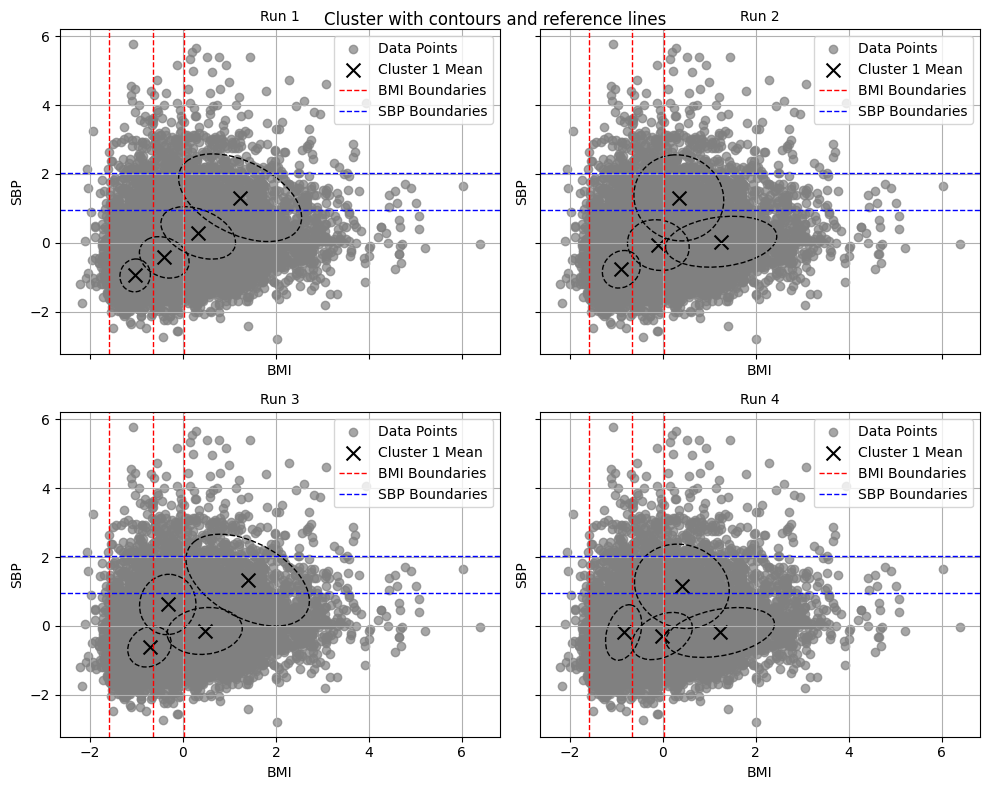

In [9]:


cols = 2  # Number of columns in the subplot grid
rows = (num_runs + cols - 1) // cols  # Calculate the required number of rows
fig, axes = plt.subplots(rows, cols, figsize=(10, 4 * rows), sharex=True, sharey=True)
axes = np.array(axes).flatten() 


for run, (ax, run_samples) in enumerate(zip(axes, all_run_samples)):
    mu_samples = np.array([s[1] for s in run_samples])  # Means
    sigma_samples = np.array([s[2] for s in run_samples])  # Covariances

    plot_with_reference_lines(mu_samples, sigma_samples, bmi_bounds, sbp_bounds, ax)
    ax.set_title(f"Run {run + 1}", fontsize=10)

plt.tight_layout()
plt.suptitle("Cluster with contours and reference lines")
plt.show()

In [10]:
# Parameters
num_runs = 4
num_iterations = 5000
K = 4  # Number of clusters
X = bmi_sbp_data[['bmi', 'sbp']].to_numpy()

# Store all iterations for each run
all_run_samples = []

# Run the Gibbs sampler multiple times
for run in range(num_runs):
    print(f"Running Gibbs Sampler for Run {run + 1}")
    run_samples = bayesian_repulsive(X, K, num_iterations, h2)
    all_run_samples.append(run_samples)

# Plot scatter graphs with last iteration results
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'cyan', 'magenta']
fig, axes = plt.subplots(1, num_runs, figsize=(6 * num_runs, 6))

if num_runs == 1:
    axes = [axes]  # Handle single plot case

for run, ax in enumerate(axes):
    last_sample = all_run_samples[run][-1]  # Get the last iteration for the current run
    _, _, _, z = last_sample  # Extract z (cluster assignments)
    for k in range(K):
        ax.scatter(
            X[np.array(z) == k, 0],
            X[np.array(z) == k, 1],
            alpha=0.7,
            color=colors[k],
            label=f"Cluster {k + 1}" if run == 0 else None,
        )
    ax.set_title(f"Run {run + 1}")
    ax.set_xlabel("BMI")
    ax.set_ylabel("SBP")
    ax.grid()

axes[0].legend(loc="upper right")
plt.tight_layout()
plt.show()

# --- Trace Plots for Multiple Runs ---
fig, axes = plt.subplots(5, num_runs, figsize=(6 * num_runs, 25))  # Adjust rows for pi, mu, and sigma

for run in range(num_runs):
    run_samples = all_run_samples[run]
    pi_samples = np.array([s[0] for s in run_samples])  # Mixing proportions
    mu_samples = np.array([s[1] for s in run_samples])  # Means
    sigma_samples = np.array([s[2] for s in run_samples])  # Covariances

    print(f"--- Run {run + 1} ---")
    
    # --- First Row: Trace Plots for Mixing Proportions (pi) ---
    print("Mixing Proportions (pi):")
    for k in range(K):
        mean_pi = np.mean(pi_samples[:, k])
        print(f"  Cluster {k + 1}: Mean = {mean_pi:.4f}")
        axes[0, run].plot(pi_samples[:, k], label=f'Cluster {k + 1}')
    axes[0, run].set_title(f"Run {run + 1}: Mixing Proportions (pi)")
    axes[0, run].set_xlabel("Iteration")
    axes[0, run].set_ylabel("Mixing Proportion")
    axes[0, run].legend(fontsize=8)
    axes[0, run].grid()

    # --- Second Row: Trace Plots for Means (mu, Dimension 1) ---
    print("Means (mu, Dimension 1):")
    for k in range(K):
        mean_mu_dim1 = np.mean(mu_samples[:, k, 0])
        print(f"  Cluster {k + 1}: Mean = {mean_mu_dim1:.4f}")
        axes[1, run].plot(mu_samples[:, k, 0], label=f'Cluster {k + 1}')
    axes[1, run].set_title(f"Run {run + 1}: Means (mu, Dimension 1)")
    axes[1, run].set_xlabel("Iteration")
    axes[1, run].set_ylabel("Mean (Dimension 1)")
    axes[1, run].legend(fontsize=8)
    axes[1, run].grid()

    # --- Third Row: Trace Plots for Means (mu, Dimension 2) ---
    print("Means (mu, Dimension 2):")
    for k in range(K):
        mean_mu_dim2 = np.mean(mu_samples[:, k, 1])
        print(f"  Cluster {k + 1}: Mean = {mean_mu_dim2:.4f}")
        axes[2, run].plot(mu_samples[:, k, 1], label=f'Cluster {k + 1}')
    axes[2, run].set_title(f"Run {run + 1}: Means (mu, Dimension 2)")
    axes[2, run].set_xlabel("Iteration")
    axes[2, run].set_ylabel("Mean (Dimension 2)")
    axes[2, run].legend(fontsize=8)
    axes[2, run].grid()

    # --- Fourth Row: Trace Plots for Variances (sigma², Dimension 1) ---
    print("Variances (sigma², Dimension 1):")
    for k in range(K):
        variances_dim1 = [sigma_samples[i, k, 0, 0] for i in range(len(sigma_samples))]
        mean_sigma_dim1 = np.mean(variances_dim1)
        print(f"  Cluster {k + 1}: Mean = {mean_sigma_dim1:.4f}")
        axes[3, run].plot(variances_dim1, label=f'Cluster {k + 1}')
    axes[3, run].set_title(f"Run {run + 1}: Variances (Dimension 1)")
    axes[3, run].set_xlabel("Iteration")
    axes[3, run].set_ylabel("Variance (Dimension 1)")
    axes[3, run].legend(fontsize=8)
    axes[3, run].grid()

    # --- Fifth Row: Trace Plots for Variances (sigma², Dimension 2) ---
    print("Variances (sigma², Dimension 2):")
    for k in range(K):
        variances_dim2 = [sigma_samples[i, k, 1, 1] for i in range(len(sigma_samples))]
        mean_sigma_dim2 = np.mean(variances_dim2)
        print(f"  Cluster {k + 1}: Mean = {mean_sigma_dim2:.4f}")
        axes[4, run].plot(variances_dim2, label=f'Cluster {k + 1}')
    axes[4, run].set_title(f"Run {run + 1}: Variances (Dimension 2)")
    axes[4, run].set_xlabel("Iteration")
    axes[4, run].set_ylabel("Variance (Dimension 2)")
    axes[4, run].legend(fontsize=8)
    axes[4, run].grid()

plt.tight_layout()
plt.show()

Running Gibbs Sampler for Run 1


Sampling:   0%|          | 0/5000 [00:00<?, ?it/s]/Users/yunjiaqi/Desktop/M4R/Samplers/gibbs_sampler.py:136: RuntimeWarning: divide by zero encountered in log
  + np.log(h(proposed_mu))
Sampling:  15%|█▍        | 726/5000 [00:50<04:59, 14.26it/s]


KeyboardInterrupt: 

In [ ]:
cols = 2  # Number of columns in the subplot grid
rows = (num_runs + cols - 1) // cols  # Calculate the required number of rows
fig, axes = plt.subplots(rows, cols, figsize=(10, 4 * rows), sharex=True, sharey=True)
axes = np.array(axes).flatten() 

bmi_bounds = np.array([18, 25, 30, np.inf])
sbp_bounds = np.array([120, 140, np.inf])

for run, (ax, run_samples) in enumerate(zip(axes, all_run_samples)):
    mu_samples = np.array([s[1] for s in run_samples])  # Means
    sigma_samples = np.array([s[2] for s in run_samples])  # Covariances

    plot_with_reference_lines(mu_samples, sigma_samples, bmi_bounds, sbp_bounds, ax)
    ax.set_title(f"Run {run + 1}", fontsize=10)

plt.tight_layout()
plt.suptitle("Cluster with contours and reference lines")
plt.show()